
# MongoDB , Sickit-Learn ,  PyMongo
****
<img src="images/last.png" alt="Drawing"  />
<p style="text-align: center;font-weight: bold;color:green;font-size:20px;"> By : “ Zakarya Rouzki ” <br></p>
<p style="text-align: center;font-weight: bold">mail : zakaryarouzki@gmail.com<br>LinkedIn : <a href="https://www.linkedin.com/in/zack404"> https://www.linkedin.com/in/zack404 <a></p>

# Importation des librairies nécessaires

In [2]:
from datetime import datetime, timedelta
import pymongo
from sys import version
from pymongo import MongoClient
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import sklearn
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print (' Version des librairies utilisé '.center(90, '-'))
print ('Python version:       ' + version)
print ('Pymongo version:      ' + pymongo.version)
print ('Sickit-Learn version:      ' + sklearn.__version__)
print ('Pandas version: {}'.format(pd.__version__))
print ('Numpy version: {}'.format(numpy.__version__))
print ('Matplotlib version: {}'.format(matplotlib.__version__))
print ('-'*90)

----------------------------- Version des librairies utilisé -----------------------------
Python version:       3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Pymongo version:      3.8.0
Sickit-Learn version:      0.20.3
Pandas version: 0.24.2
Numpy version: 1.16.2
Matplotlib version: 3.0.3
------------------------------------------------------------------------------------------


# Ouvrir une connexion avec le serveur MongoDB

In [52]:
try: 
    client = MongoClient("localhost", 27017)
    print ("Connected to MongoDB as:", client)
except (pymongo.errors.ConnectionFailure, e):
    print ("Could not connect to MongoDB: %s") % e 

Connected to MongoDB as: MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


# On accés à notre base de donnée 

In [53]:
db = client.ML_DB
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ML_DB')


# Vérification du liaison avec le serveur

In [54]:
print ('-'*75)
print ('Databases ouvert sur le client : ', client.list_database_names())
print ('Le nom de la collection dans la base donné :   ', db.list_collection_names())
print ('-'*75)

---------------------------------------------------------------------------
Databases ouvert sur le client :  ['DBPL', 'ML_DB', 'admin', 'config', 'local']
Le nom de la collection dans la base donné :    ['weatherData', 'test', 'advertising', 'iris']
---------------------------------------------------------------------------


# Récupération de la listes des collections

In [55]:
# to prevent colision cases in db with previous db connetions: 

print(db.list_collection_names())

for name in db.list_collection_names():
    print ("- collection trouvé : " ,name)



['weatherData', 'test', 'advertising', 'iris']
- collection trouvé :  weatherData
- collection trouvé :  test
- collection trouvé :  advertising
- collection trouvé :  iris


# Récupération des informations basiques sur une collection

In [9]:
print ('Nom de la base donnée : \n', db.advertising.name)
print ('-'*75)
print ('Discription complète: \n', db.advertising.acknowledged)
print ('-'*75)


Nom de la base donnée : 
 advertising
---------------------------------------------------------------------------
Discription complète: 
 Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ML_DB'), 'advertising.acknowledged')
---------------------------------------------------------------------------


# Récupération du contenu d'une collection

In [56]:
for doc in db.advertising.find():
    print (doc)

{'_id': ObjectId('5cd81fae211514ef0d93df0e'), '': 1, 'TV': 230.1, 'Radio': 37.8, 'Newspaper': 69.2, 'Sales': 22.1}
{'_id': ObjectId('5cd81fae211514ef0d93df0f'), '': 2, 'TV': 44.5, 'Radio': 39.3, 'Newspaper': 45.1, 'Sales': 10.4}
{'_id': ObjectId('5cd81fae211514ef0d93df10'), '': 3, 'TV': 17.2, 'Radio': 45.9, 'Newspaper': 69.3, 'Sales': 9.3}
{'_id': ObjectId('5cd81fae211514ef0d93df11'), '': 4, 'TV': 151.5, 'Radio': 41.3, 'Newspaper': 58.5, 'Sales': 18.5}
{'_id': ObjectId('5cd81fae211514ef0d93df12'), '': 5, 'TV': 180.8, 'Radio': 10.8, 'Newspaper': 58.4, 'Sales': 12.9}
{'_id': ObjectId('5cd81fae211514ef0d93df13'), '': 6, 'TV': 8.7, 'Radio': 48.9, 'Newspaper': 75, 'Sales': 7.2}
{'_id': ObjectId('5cd81fae211514ef0d93df14'), '': 9, 'TV': 8.6, 'Radio': 2.1, 'Newspaper': 1, 'Sales': 4.8}
{'_id': ObjectId('5cd81fae211514ef0d93df15'), '': 10, 'TV': 199.8, 'Radio': 2.6, 'Newspaper': 21.2, 'Sales': 10.6}
{'_id': ObjectId('5cd81fae211514ef0d93df16'), '': 11, 'TV': 66.1, 'Radio': 5.8, 'Newspaper': 24

<p style="color: red; font-size:200%; font-weight: bold;text-align:center;">Quelques opération basique sur les collections <p>

# Insertion d'un document dans la collection

In [57]:
#création d'une collection
db.create_collection("test")

#création d'un document à ajouté
document = {"x": "jpcolino", "tags": ["author", "developer", "tester"]}
print(type(document))

#insertion d'un document
db.test.insert_one(document)

CollectionInvalid: collection test already exists

# Insertion de plusieurs documents dans la collection

In [58]:
result = db.test.insert_many([{"x": 1, "tags": ["dog", "cat"]},
                              {"x": 2, "tags": ["cat"]},
                              {"x": 2, "tags": ["mouse", "cat", "dog"]},
                              {"x": 3, "tags": []},
                              {"y": 4, "tags": 123456}])
for doc in db.test.find():
    print (doc)

{'_id': ObjectId('5cda98a689b4823153c71c69'), 'x': 1, 'tags': ['dog', 'cat']}
{'_id': ObjectId('5cda98a689b4823153c71c6a'), 'x': 2, 'tags': ['cat']}
{'_id': ObjectId('5cda98a689b4823153c71c6b'), 'x': 2, 'tags': ['mouse', 'cat', 'dog']}
{'_id': ObjectId('5cda98a689b4823153c71c6c'), 'x': 3, 'tags': []}
{'_id': ObjectId('5cda98a689b4823153c71c6d'), 'y': 4, 'tags': 123456}
{'_id': ObjectId('5cdad28c89b4823153c71c6f'), 'x': 1, 'tags': ['dog', 'cat']}
{'_id': ObjectId('5cdad28c89b4823153c71c70'), 'x': 2, 'tags': ['cat']}
{'_id': ObjectId('5cdad28c89b4823153c71c71'), 'x': 2, 'tags': ['mouse', 'cat', 'dog']}
{'_id': ObjectId('5cdad28c89b4823153c71c72'), 'x': 3, 'tags': []}
{'_id': ObjectId('5cdad28c89b4823153c71c73'), 'y': 4, 'tags': 123456}


# Suppression d'un document

In [62]:
db.test.delete_one({'x':'1'})

for doc in db.test.find():
    print (doc)

{'_id': ObjectId('5cda98a689b4823153c71c69'), 'x': 1, 'tags': ['dog', 'cat']}
{'_id': ObjectId('5cda98a689b4823153c71c6a'), 'x': 2, 'tags': ['cat']}
{'_id': ObjectId('5cda98a689b4823153c71c6b'), 'x': 2, 'tags': ['mouse', 'cat', 'dog']}
{'_id': ObjectId('5cda98a689b4823153c71c6c'), 'x': 3, 'tags': []}
{'_id': ObjectId('5cda98a689b4823153c71c6d'), 'y': 4, 'tags': 123456}
{'_id': ObjectId('5cdad28c89b4823153c71c6f'), 'x': 1, 'tags': ['dog', 'cat']}
{'_id': ObjectId('5cdad28c89b4823153c71c70'), 'x': 2, 'tags': ['cat']}
{'_id': ObjectId('5cdad28c89b4823153c71c71'), 'x': 2, 'tags': ['mouse', 'cat', 'dog']}
{'_id': ObjectId('5cdad28c89b4823153c71c72'), 'x': 3, 'tags': []}
{'_id': ObjectId('5cdad28c89b4823153c71c73'), 'y': 4, 'tags': 123456}


# Recherche dans la collection avec une attribut

In [63]:
print ('Nombre des documents : ', db.test.count_documents({}))
print ('-'*75)
print ("Nombres des documents avec l'attribut 'x':",db.test.count_documents({'x': 2}))

Nombre des documents :  10
---------------------------------------------------------------------------
Nombres des documents avec l'attribut 'x': 4


<p style="color: red; font-size:200%; font-weight: bold;text-align:center;">C'est quoi une dataSet Iris ?<p>

![Iris](images/iris.png)
<p style="text-align:center; font-weight:bold;"> La fleur IRIS </p>

# Description du dataSet

- 50 échantillons de 3 espèces différentes d'iris ( <b>50*3 = 150</b> échantillons au total)
- Mesures: longueur des sépales, largeur des sépales, longueur des pétales, largeur des pétales

![Iris_csv](images/csv_iris.png)

# Construction du DataSet depuis les données de MongoDB

In [1]:
# Création du dataframe en utilisant pandas dictionnary
data_set = pd.DataFrame(columns=('Id',  'sepalL',  'sepalW',  'petalL',  'petalW', 'class'))

i=0
for doc in db.iris.find():
    #print (doc["_id"])
    data_set.loc[i]=[i] + [ doc["sepalL"]] + [doc["sepalW"]] + [ doc["petalL"]] + [ doc["petalW"]] + [doc["class"]]
    i=i+1
print(data_set.shape)  
print(data_set.describe())
print(type(data_set))
data_set


NameError: name 'pd' is not defined

# Suppression de la colonne Id

In [65]:
data_set = data_set.drop('Id',axis=1)
print(data_set.head(5))

   sepalL  sepalW  petalL  petalW        class
0     5.1     3.5     1.4     0.2  Iris-setosa
1     5.0     3.6     1.4     0.2  Iris-setosa
2     5.4     3.9     1.7     0.4  Iris-setosa
3     4.6     3.4     1.4     0.3  Iris-setosa
4     5.0     3.4     1.5     0.2  Iris-setosa


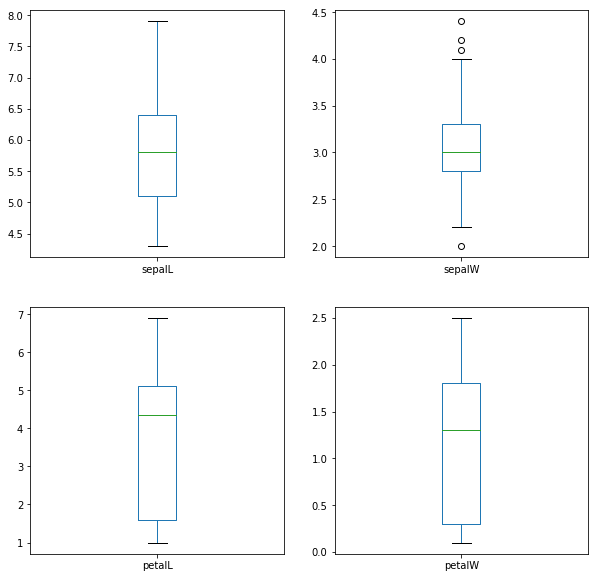

In [18]:
data_set.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,figsize=(10,10))
plt.show()

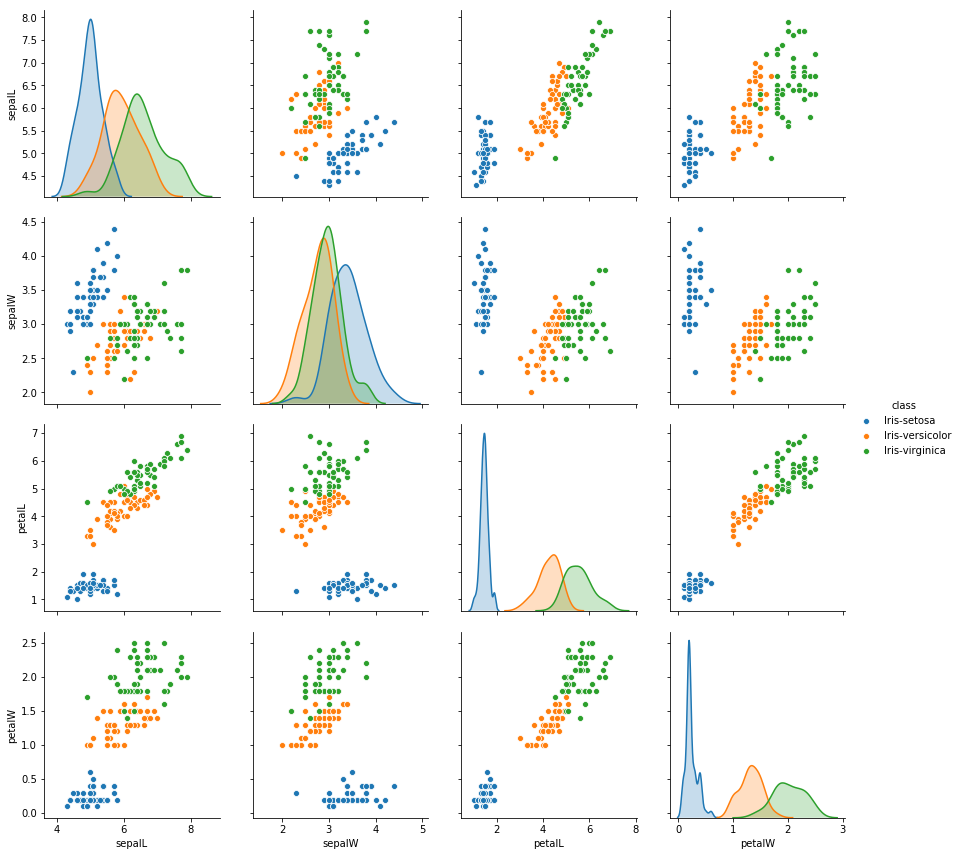

In [19]:
seaborn.pairplot(data_set, hue="class", height=3, diag_kind="kde")
plt.show()

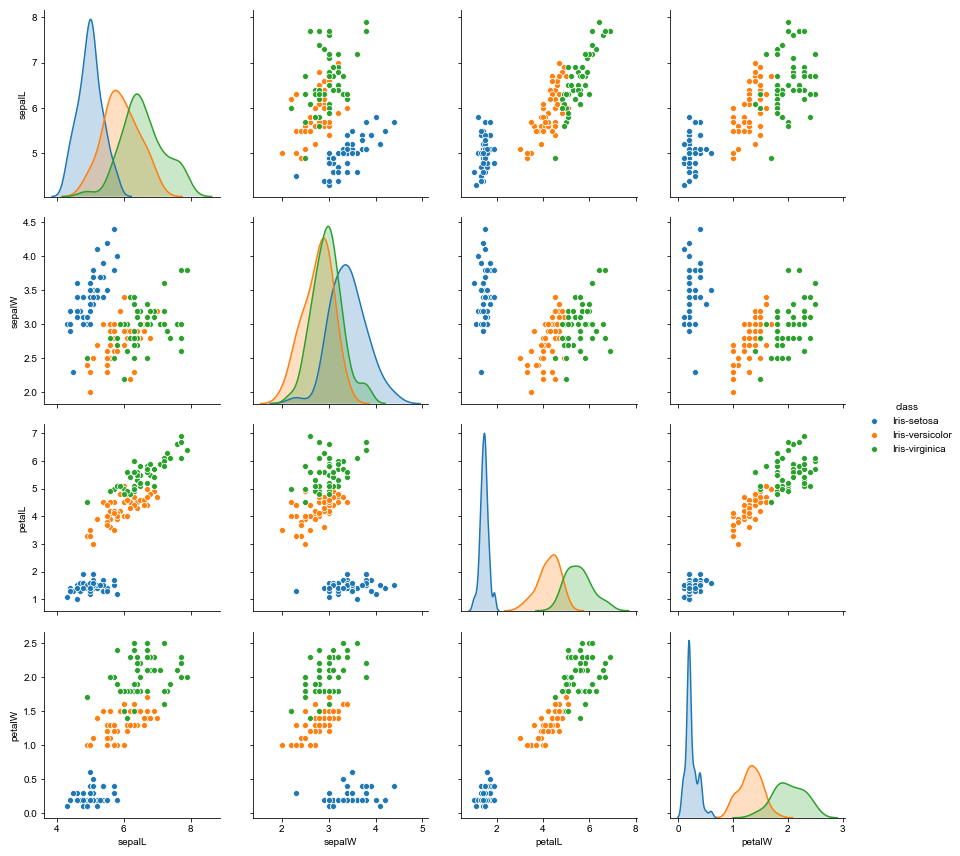

In [20]:
seaborn.pairplot(data_set, hue="class", height = 3)
seaborn.set()

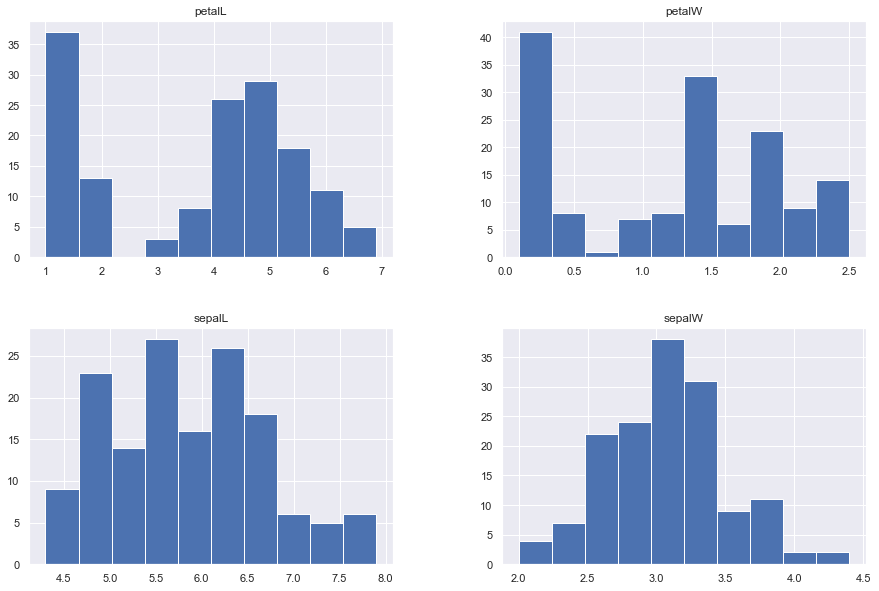

In [21]:
data_set.hist(figsize=(15,10))
plt.show()


<p style="color: red; font-size:220%; font-weight: bold;text-align:center;">ʻʻ Machine Learning ʼʼ<p>

In [66]:
# génération d'un tableau de donnéés

array = data_set.values
array

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Iris-setosa'],
       [5.0, 3.0, 1.6, 0.2, 'Iri

Sélectionnez toutes les lignes et seulement les 4 premiers attributs: SepalL, SepalW, PetalW, PetalL

In [23]:
X = array[:,0:4]
X

array([[5.1, 3.5, 1.4, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.9, 3.0, 1.4, 0.2],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [4.6, 3.6, 1.0, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.1, 3.7, 1.5, 0.4],
       [5.1, 3.8, 1.5, 0.3],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4

Sélectionnez toutes les lignes et le 5ème attribut. Contenu: Iris-setosa, Iris-versicolor, Iris-virginica

In [67]:
Y = array[:,4]
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

80% de l'ensemble de données pour entrainer les modèles et 20% de l'ensemble de données pour valider.

In [26]:
validation_size = 0.20

Chargez les données d'apprentissage dans X_train et Y_train pour préparer des modèles, et dans les ensembles X_validation et Y_validation pour tester ou valider notre modèle.

In [42]:
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, 
                                                                                Y, 
                                                                                test_size=validation_size, 
                                                                                random_state=seed)

# Utilisation de l'algorithme SVM pour entrainé les données

In [68]:

svm = SVC()
svm.fit(X_train, Y_train)
prediction_de_validation_svm = svm.predict(X_validation)

print("Score de précision :")
print(accuracy_score(Y_validation, prediction_de_validation_svm))
print()

print("confusion_matrix:")
print(confusion_matrix(Y_validation, prediction_de_validation_svm))
print()

print("classification_report:")
print(classification_report(Y_validation, prediction_de_validation_svm))
print()

Score de précision :
1.0

confusion_matrix:
[[ 7  0  0]
 [ 0 12  0]
 [ 0  0 11]]

classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




C:\Users\Pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Utilisation de l'algorithme Naive-Bayes pour entrainé les données

In [44]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train)

prediction_de_validation_naive = y_pred.predict(X_validation)

print("Score de précision :")
print(accuracy_score(Y_validation, prediction_de_validation_naive))
print()

print("confusion_matrix:")
print(confusion_matrix(Y_validation, prediction_de_validation_naive))
print()

print("classification_report:")
print(classification_report(Y_validation, prediction_de_validation_naive))
print()

Score de précision :
0.9

confusion_matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30




<p style="text-align: Center; color: red; font-size: 185.7%; font-weight: bold;">Etape Finale : Prédiction et conclusion d'un type de fleurs iris <p>

Prédiction en utilisant deux vecteurs ( deux fleurs à classer )

In [69]:
#Création des 2 vecteurs
X_new = numpy.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (2, 4)


<p style="color: #3499CD; font-size: 120%; font-weight: bold;">Utilisation de l'algorithme pour prédire :</p>

<p style="font-weight: bold;"> * Avec SVM </p>

In [46]:
prediction_svm = svm.predict(X_new)

<p style="font-weight: bold;"> * Avec Naive-Bayes </p>

In [47]:
prediction_naive = y_pred.predict(X_new)

<p style="color: green; font-size: 120%; font-weight: bold;">Résultat finale : </p>

<p style="font-weight: bold;"> * Avec SVM </p>

In [70]:
print("Prédiction de la classe : {}".format(prediction_svm))

Prédiction de la classe : ['Iris-versicolor' 'Iris-setosa']


<p style="font-weight: bold;"> * Avec Naive-Bayes </p>

In [49]:
print("Prédiction de la classe : {}".format(prediction_naive))

Prédiction de la classe : ['Iris-versicolor' 'Iris-setosa']


<p style="text-align: Center; color: red; font-size: 185.7%; font-weight: bold;">./Done  <p>
 <p style="text-align:right"> Zack404 </p>